In [5]:
#Importing necessary libraries
import numpy as np # numerical computing 
import pandas as pd # data processing
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [6]:
#importing the data
cs = pd.read_csv('C:/Users/ss/Downloads/Task 4/ifood_df.csv')

#top 5 rows 
cs.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [57]:
cs.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'Marital', 'In_relationship', 'Cluster'],
      dtype='object')

In [9]:
cs.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [12]:
cs.duplicated().sum()

184

The `nunique()` function in Python, typically used with pandas, returns the number of **unique** values in a column or Series. It helps in understanding the diversity of values in a dataset, indicating how many distinct items exist in a particular feature or variable.


In [58]:
cs.nunique()

Income                  1961
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 773
MntFruits                158
MntMeatProducts          550
MntFishProducts          182
MntSweetProducts         175
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal      

In [14]:
cs.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [59]:
cs.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'Marital', 'In_relationship', 'Cluster'],
      dtype='object')

# Data Exploration

### Box plot - Total amount spent on all products (MntTotal)

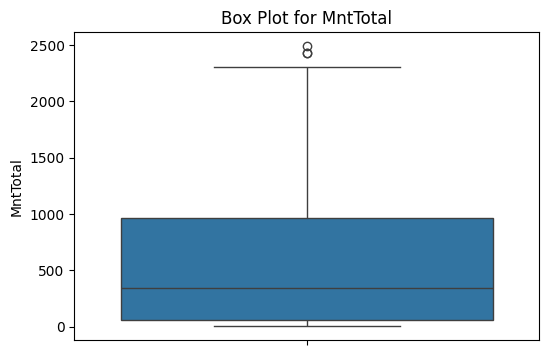

In [15]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=cs, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

### Outlier Handling using IQR method

#### The Interquartile Range (IQR) method identifies outliers by calculating the range between the first (Q1) and third (Q3) quartiles of a dataset, then determining lower and upper bounds as \( Q1 - 1.5 \times \text{IQR} \) and \( Q3 + 1.5 \times \text{IQR} \). Data points outside these bounds are considered outliers.

In [16]:
Q1 = cs['MntTotal'].quantile(0.25)
Q3 = cs['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = cs[(cs['MntTotal'] < lower_bound) | (cs['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [17]:
cs = cs[(cs['MntTotal'] > lower_bound) & (cs['MntTotal'] < upper_bound)]
cs.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


## Univariate Analysis 
### 1. Income 

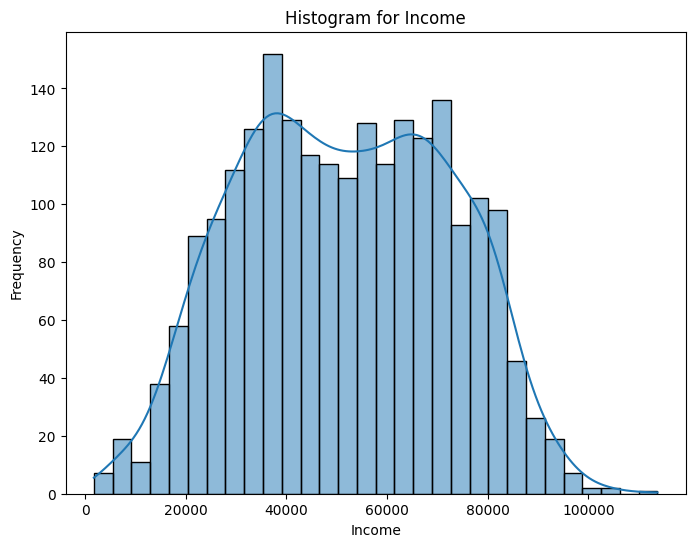

In [19]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=cs, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

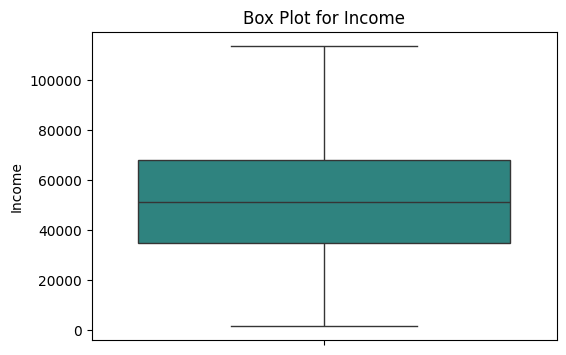

In [18]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=cs, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

### 2. Age

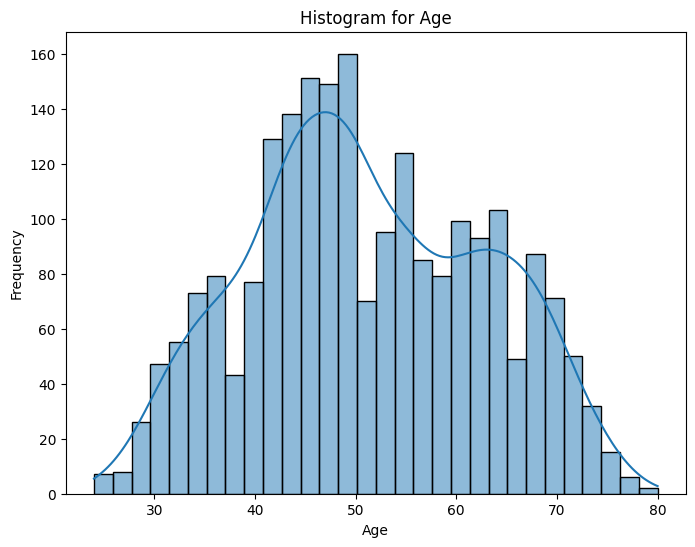

In [20]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=cs, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.089941
Kurtosis: -0.797036


## Correlation matrix

A **correlation matrix** is used to show the strength and direction of relationships between multiple variables in a dataset. It helps identify patterns, such as which variables are strongly positively or negatively correlated, enabling better feature selection, multicollinearity detection, and insights into the data structure.

In [22]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

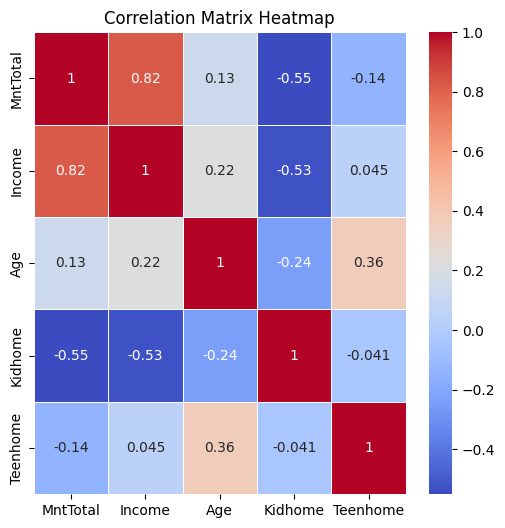

In [23]:
corr_matrix = cs[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engineering 

New feature - Marital, In-Relationship

In [28]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
cs['Marital'] = cs.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

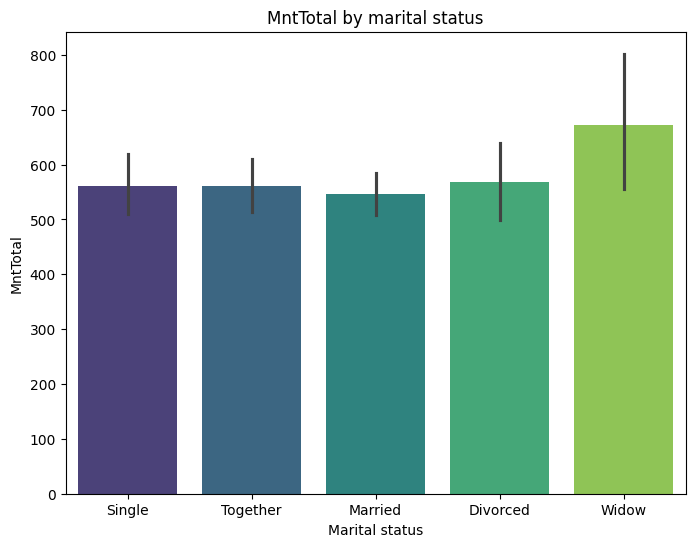

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=cs, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [30]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
cs['In_relationship'] = cs.apply(get_relationship, axis=1)
cs.head()  

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


# K-Means Clustering

K-Means is a popular unsupervised learning algorithm used for clustering, where the goal is to partition data points into 
𝐾
K clusters. It is one of the simplest and most widely used clustering algorithms, mainly because of its efficiency and ease of implementation.

The idea behind K-Means is to group similar data points together by minimizing the variance within each cluster. Each cluster has a centroid, which is the mean (average) of all points in that cluster.

In [31]:
from sklearn.cluster import KMeans

1. Standardizing data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = cs.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(cs[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


2. Principal Component Analysis (PCA)

In [35]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

3. Elbow method

In [36]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

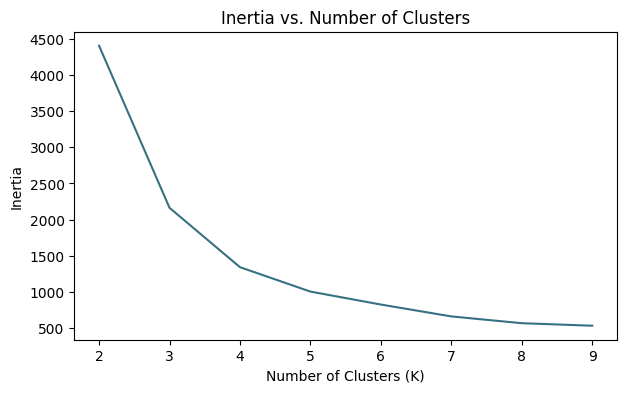

In [39]:
plt.figure(figsize=[7,4])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

4. Silhouette score analysis

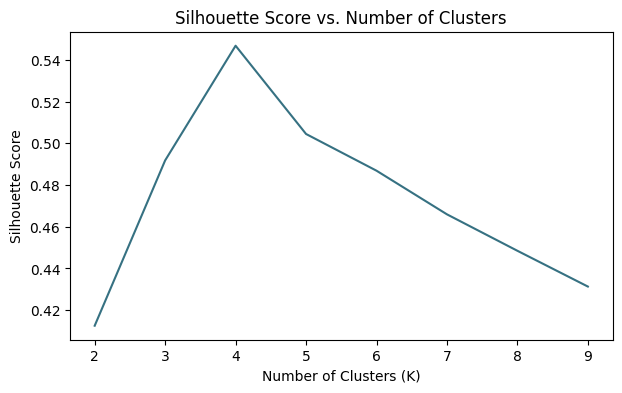

In [41]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,4])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [42]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

Now lets explore the clusters

1. Visualisation of clusters

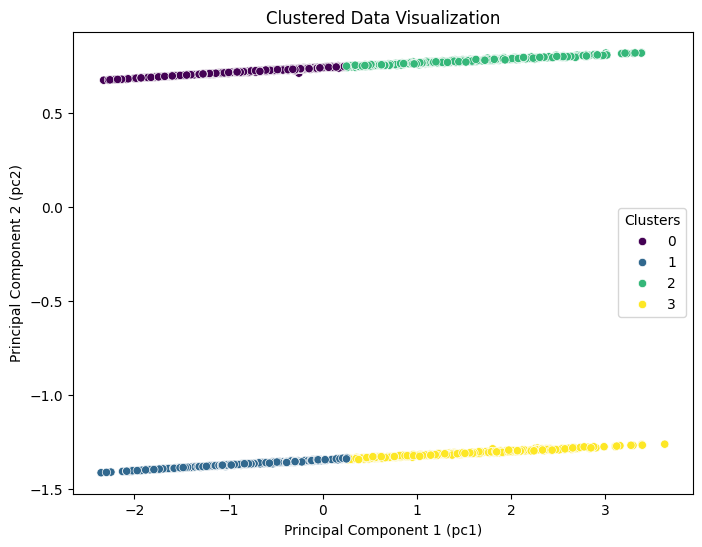

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [44]:
cs['Cluster'] = data_scaled.Cluster
cs.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,38027.656977,160.412791,1.0
1,37332.339956,150.761589,0.0
2,71914.598930,1153.197861,1.0
3,71946.155488,1159.612805,0.0


2. Mean consumption of different product types by cluster

In [45]:
mnt_data = cs.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,160.412791,135.405814,93.372093,7.689535,39.789535,11.547674,8.013953,25.006977
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1153.197861,1082.465241,625.964349,52.814617,343.479501,75.959002,54.980392,70.732620
3,3,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488


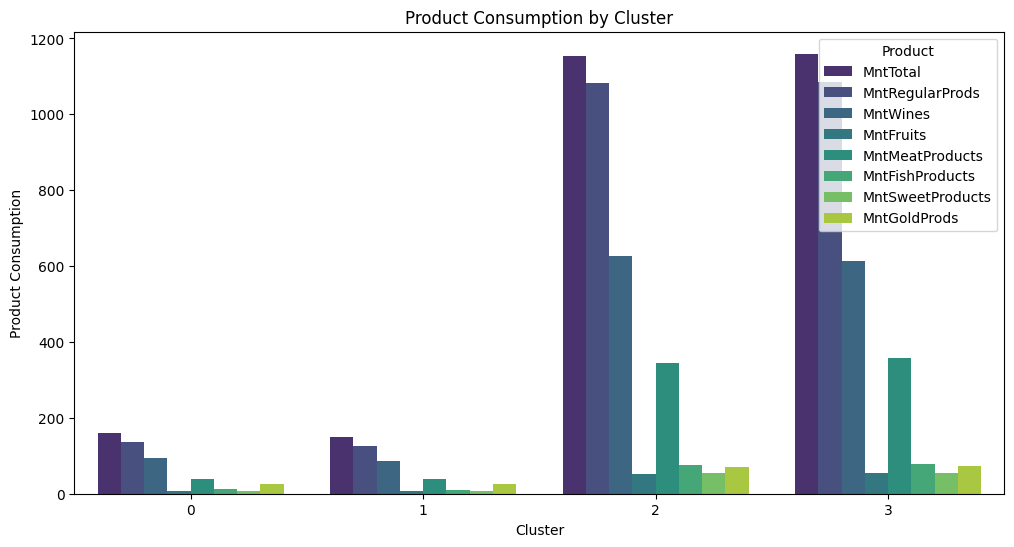

In [46]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

3. Cluster sizes

Text(0, 0.5, 'MntTotal')

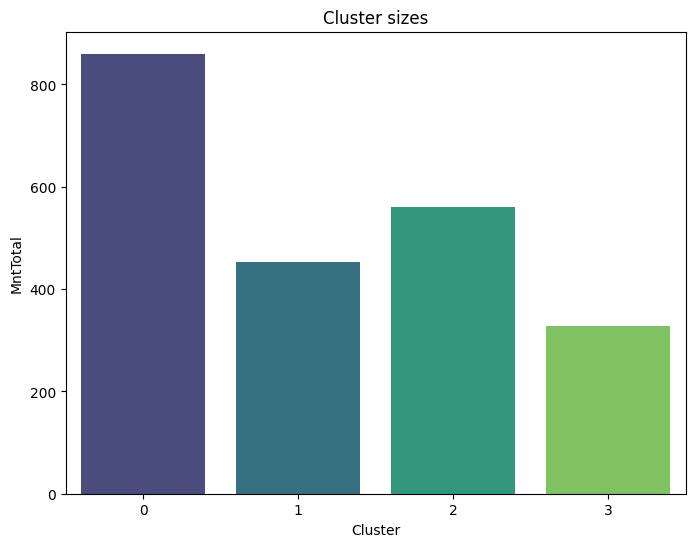

In [56]:
cluster_sizes = cs.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [49]:
total_rows = len(cs)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,860,39.0
1,1,453,21.0
2,2,561,25.0
3,3,328,15.0


4. Income by cluster

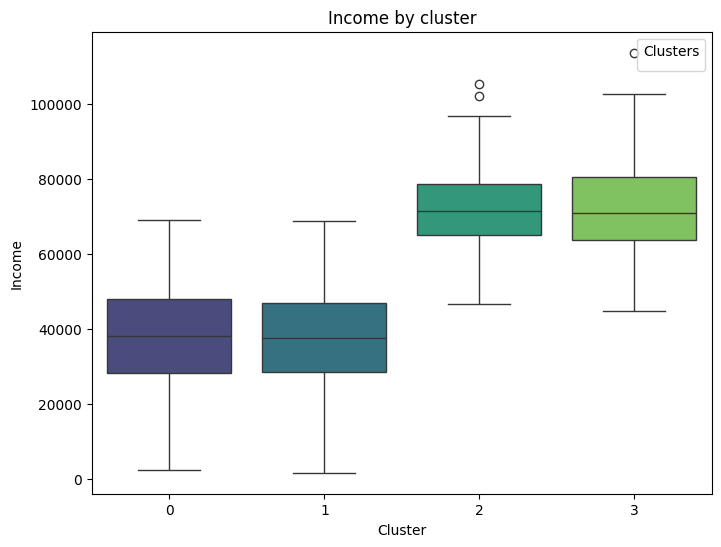

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=cs, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

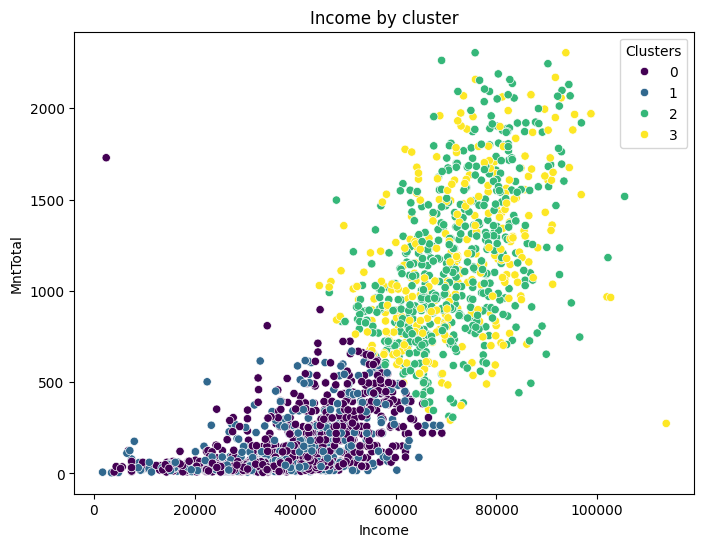

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=cs, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

5. In_relationship feature by cluster

Text(0, 0.5, 'In_relationship')

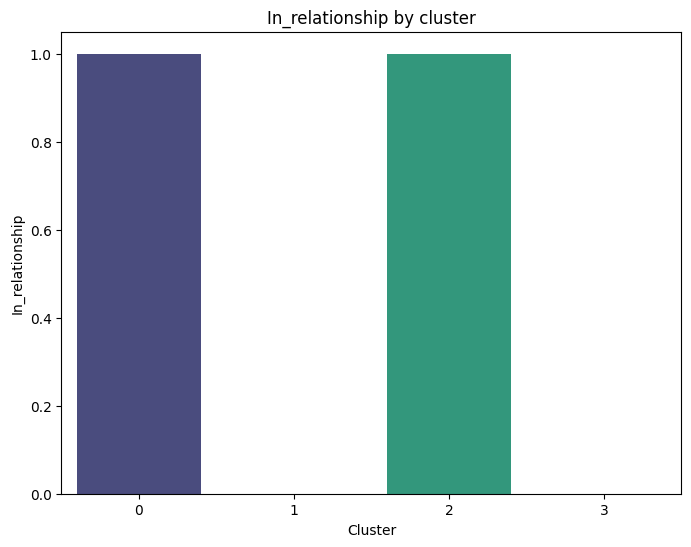

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=cs, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')



### **Results**

This section presents the findings from the **K-means clustering analysis**, which aimed to segment customers based on their total spending (denoted as **MntTotal**) and demographic features such as **Income** and **In_relationship**.

#### **Optimal Number of Clusters: 4**
The optimal number of clusters was determined to be **4**. Both the **Elbow Method** and **Silhouette Score analysis** pointed to four clusters as the most appropriate choice. The Elbow Method indicated that the number of clusters should be around 4 or 5, while the Silhouette Score reached its highest value at **k=4**, confirming this as the optimal number of clusters for the analysis.

#### **Cluster Profiles:**

- **Cluster 0: High-Spending Customers in Relationships**  
  This group accounts for **26%** of the customer base. These individuals have **high income** and are currently in a relationship (either married or living together).  
   
- **Cluster 1: Low-Spending Single Customers**  
  Representing **21%** of the customer base, these customers have **low income** and are **single**. They contribute less to total spending compared to other segments.

- **Cluster 2: High-Spending Single Customers**  
  This segment comprises **15%** of the customer base. These customers enjoy a **high income** and are **single**, indicating they make significant purchases despite their relationship status.

- **Cluster 3: Low-Spending Customers in Relationships**  
  Making up **39%** of the customer base, these customers have **low income** and are in a relationship. They represent a large portion of the customer pool, but their spending is relatively low compared to others.





### **Recommendations**

Based on the customer segmentation results, we can develop targeted marketing strategies for each cluster, considering their unique characteristics and preferences.

#### **Marketing Strategies for Each Cluster:**

- **Cluster 0: High-Value Customers in Relationships (Married or Cohabiting)**  
  Analysis indicates that this group, which consists of **high-income** individuals, tends to purchase more **wines** and **fruits**. A targeted campaign promoting **premium wines** or high-quality food items could be highly effective for this segment. Additionally, since these customers are in relationships, **family-oriented promotional images** and messaging (e.g., special offers for couples or family gatherings) would resonate well with them.

- **Cluster 1: Low-Value Single Customers**  
  This segment, representing customers with **lower income** and **single status**, could be incentivized with promotions such as **discounts** and **coupons**. A **loyalty program** could also be effective in encouraging repeat purchases and fostering customer retention. Offering small rewards for frequent purchases may help motivate this group to buy more often.

- **Cluster 2: High-Value Single Customers**  
  Similar to **Cluster 0**, this group of **high-income single customers** has a preference for **wines** and **fruits**. However, since they are single, promotional content should reflect their lifestyle—consider using imagery that focuses on **socializing with friends**, **parties**, or **solo travel experiences**. Tailored campaigns that appeal to their **independent and social nature** could drive more engagement with this segment.

- **Cluster 3: Low-Value Customers in Relationships**  
  Representing the largest portion of the customer base (**39%**), this segment consists of **low-income** individuals who are in relationships. To boost their purchasing frequency, **family-oriented offers** and **discounts** would be effective, as well as promotions highlighting products suited for **family use** (e.g., bulk deals or budget-friendly meal packs).

